In [769]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


train_data = pd.read_csv('E:/Github_dir/data_analysis_py/Loan Prediction/train.csv')
test_data = pd.read_csv('E:/Github_dir/data_analysis_py/Loan Prediction/test.csv')
data = pd.concat([train_data,test_data])

print (train_data.shape, test_data.shape, data.shape)

((614, 13), (367, 12), (981, 13))


In [770]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [771]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


## First we will assign the null values of the data set

###### Here are some data status from the describe() function

1.There are (981-902) = 79 missing values in credit_history   
2.There are (981-954) = 27 missing values in LoanAmount  
3.There are (981-961) = 20 missing values in Loan_ammount_term  
4.We can also look that about 84% applicants have a credit_history.Because The mean of Credit_History field is 0.84   

In [772]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No


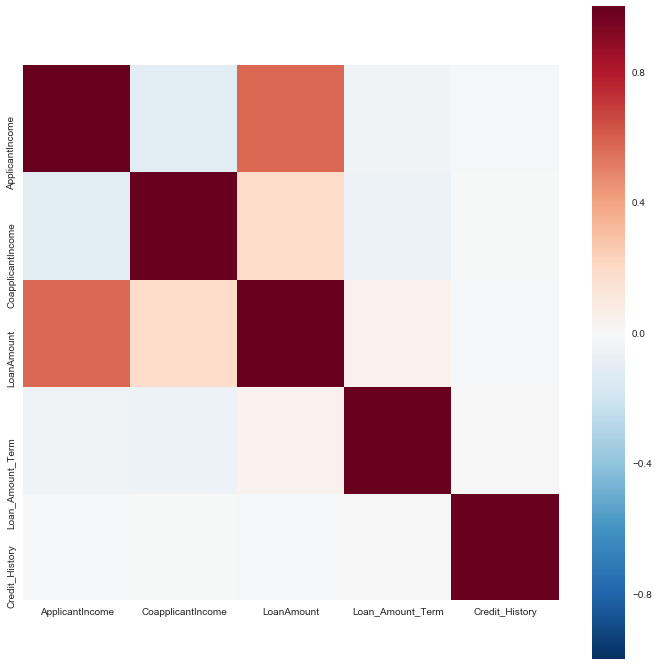

In [773]:
#check the correlation of the numerical feautres


corr = train_data.select_dtypes(include = ['float64', 'int64']).corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [774]:
#Check for Nan or null values
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
dtype: int64

In [775]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [776]:
print (sum(train_data.Credit_History.isnull()), sum(test_data.Credit_History.isnull()))

(50, 29)


In [777]:
# There are 79 nulls in credit_history column
#Let's change the column to a column of string
#type with values 'Yes', 'No', 'Unknown'.

credit_dict = {1.0:'Yes', 0.0:'No'}

train_data.Credit_History = train_data.Credit_History.replace(credit_dict)
test_data.Credit_History = test_data.Credit_History.replace(credit_dict)
train_data.Credit_History = train_data.Credit_History.fillna('Unknown')
test_data.Credit_History = test_data.Credit_History.fillna('Unknown')

In [778]:
print (sum(train_data.Dependents.isnull()), sum(test_data.Dependents.isnull()))

(15, 10)


In [779]:
#There are 25 nulls in the Dependents column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Credit History column.

replace_dict = {'0':'0', '1':'1', '2':'2', '3+':'3'}

train_data.Dependents = train_data.Dependents.replace(replace_dict)
test_data.Dependents = test_data.Dependents.replace(replace_dict)
train_data.Dependents = train_data.Dependents.fillna('Unknown')
test_data.Dependents = test_data.Dependents.fillna('Unknown')

In [780]:
#There are 24 nulls in the Gender column. They are spread between both
#the train and the test set. Let's replace them with a string value again.

train_data.Gender = train_data.Gender.fillna('Unknown')
test_data.Gender = test_data.Gender.fillna('Unknown')

In [781]:
print(train_data.Self_Employed.value_counts(),test_data.Self_Employed.value_counts())

(No     500
Yes     82
Name: Self_Employed, dtype: int64, No     307
Yes     37
Name: Self_Employed, dtype: int64)


In [782]:
#There are 24 nulls in the Self_Employed column. They are spread between both
#the train and the test set. Let's repeat the data tidying process we used on
#the Self_Employed column.

# we will fil the self employed with No as The count of NO is high in both the data set

train_data.Self_Employed = train_data.Self_Employed.fillna('No')
test_data.Self_Employed = test_data.Self_Employed.fillna('No')

In [783]:
#There are 3 nulls in the Married column. Only the train set contains null values.
#This is not a problem. However, one must remember to take extra caution when creating dummy
#variables prior to feeding the data into models.

train_data.Married = train_data.Married.fillna('Unknown')
test_data.Married = test_data.Married.fillna('Unknown')

In [784]:
# First we fill the null values of loan amount term of the data

train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace=True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(), inplace=True)


train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(), inplace=True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(), inplace=True)

data = pd.concat([train_data,test_data])
data.apply(lambda x: sum(x.isnull()))

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
dtype: int64

In [785]:
#Excellent. Now the only null values in our data set are the target values we
#aim to predict. Let's save the train and test sets as separate CSV files and start
#a new python file.

train_data.to_csv('claim_train2.csv', index=False)
test_data.to_csv('claim_test2.csv', index=False)

## Here comes the exploratory DATA ANALYSIS part

In [786]:
train = pd.read_csv('E:/Github_dir/data_analysis_py/Loan Prediction/claim_train2.csv')
test = pd.read_csv('E:/Github_dir/data_analysis_py/Loan Prediction/claim_test2.csv')
data = pd.concat([train_data,test_data])
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,Yes,0,Graduate,Male,146.412162,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,Yes,1,Graduate,Male,128.000000,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,Yes,0,Graduate,Male,66.000000,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,Yes,0,Not Graduate,Male,120.000000,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,Yes,0,Graduate,Male,141.000000,360.0,LP001008,Y,No,Urban,No


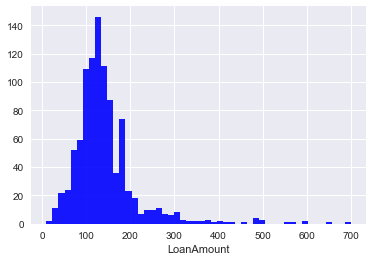

In [787]:
sns.distplot(data['LoanAmount'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

The graph shows most of the loanamount falls in the range 0 to 200 with a fat tail 

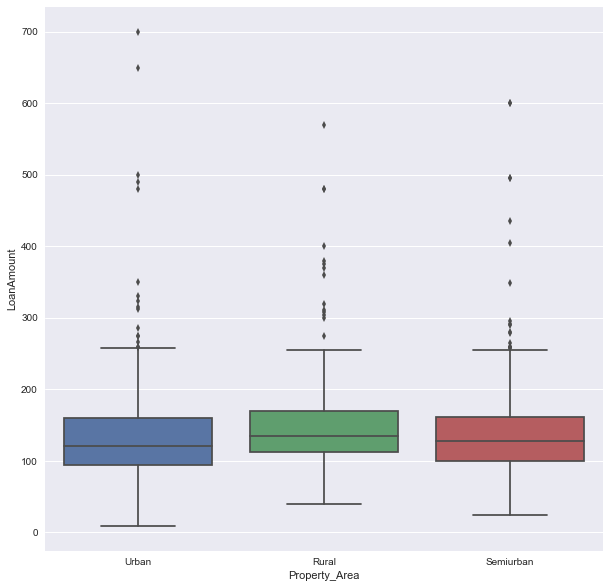

In [788]:
# let's check loanamount varies with property area

plt.figure(figsize=(10,10))
sns.boxplot(x='Property_Area',y='LoanAmount',data=train)

From above box plot we can see that property area has similar means of loan range  
But we can see urban area has larger width range of loan ammounts

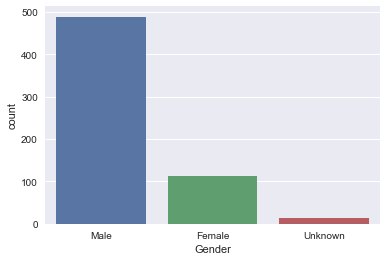

In [789]:
sns.countplot('Gender',data=train)

In [790]:
# Let's check loan status variation with gender especilly male and female

gb = data.groupby(by=['Gender','Loan_Status'])
gbs = gb.size()
female_loan_rate = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
                         
male_loan_rate =   (float(gbs[3]) / float(gbs[2] + gbs[3]))*100

print male_loan_rate,female_loan_rate

69.3251533742 66.9642857143


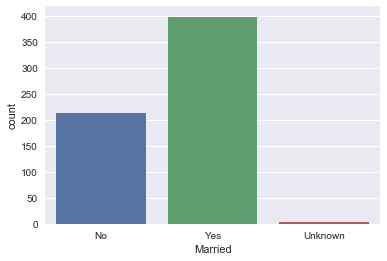

In [791]:
sns.countplot('Married',data=train)

In [792]:
# Let's check marrital status vs loan status rate

gb = data.groupby(by=['Married','Loan_Status'])
gbs = gb.size()
gbs

Married  Loan_Status
No       N               79
         Y              134
Unknown  Y                3
Yes      N              113
         Y              285
dtype: int64

In [793]:
unmarried = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
married = (float(gbs[4]) / float(gbs[3] + gbs[4]))*100

print (married,unmarried)

(71.60804020100502, 62.91079812206573)


married people are approved loan at better rate than unmarried people

In [794]:
# let's check loan status of self employed column

gb = data.groupby(by=['Self_Employed','Loan_Status'])
gbs = gb.size()
gbs

Self_Employed  Loan_Status
No             N              166
               Y              366
Yes            N               26
               Y               56
dtype: int64

In [795]:
not_self = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
self = (float(gbs[3]) / float(gbs[2] + gbs[3]))*100

print (not_self, self)

(68.796992481203, 68.29268292682927)


both self employed and not self  emplyed people have approximately similar loan status rate

In [796]:
# Let's check education vs loan status 

gb = data.groupby(by=['Education','Loan_Status'])
gbs = gb.size()
gbs

Education     Loan_Status
Graduate      N              140
              Y              340
Not Graduate  N               52
              Y               82
dtype: int64

In [797]:
grad = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
not_grad = (float(gbs[3]) / float(gbs[2] + gbs[3]))*100

print (grad, not_grad)

(70.83333333333334, 61.19402985074627)


As it is seen that graduates are approved loan at higher rate than not grads

In [798]:
# Let's check credit history
gb = data.groupby(by=["Credit_History", "Loan_Status"])
gbs = gb.size()
gbs

Credit_History  Loan_Status
No              N               82
                Y                7
Unknown         N               13
                Y               37
Yes             N               97
                Y              378
dtype: int64

In [799]:
no = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
yes = (float(gbs[5]) / float(gbs[4] + gbs[5]))*100

print (yes, no)

(79.57894736842105, 7.865168539325842)


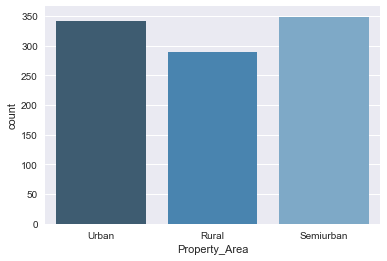

In [800]:
#No big suprise here. Only 7.8% of applicants whose credit history did not
#meet guidelines were approved loans, compared to 79.5% for those who history
#was up to scratch. An interesting question is why the 7.8% were approved
#housing loans. Perhaps this dataset hints at reasons for the trouble in the
#US housing market that sparked off the Great Recession.

sns.countplot(x="Property_Area", data=data, palette="Blues_d")

In [801]:
#All three property areas are well represented in the data set, with semiurban having slightly
#more appearances than urban.

gb = data.groupby(by=["Property_Area", "Loan_Status"])
gbs = gb.size()

rural = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
semiurban = (float(gbs[3]) / float(gbs[2] + gbs[3]))*100
urban = (float(gbs[5]) / float(gbs[4] + gbs[5]))*100

print (rural, semiurban, urban)

(61.452513966480446, 76.82403433476395, 65.84158415841584)


#Semiurban has the highest approval rate, some 15% higher than the lowest urban.
#Presumably semiurban refers to the suburbs, as far as I am aware these tend to
#be the most affluent areas in America. Those looking to live in such areas
#presumably command the incomes necessary to buy houses in those areas, and as
#a result banks end up approving more loans in these areas than in urban and
#rural areas.

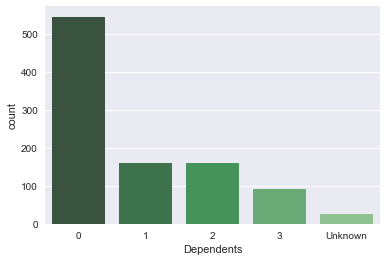

In [802]:
sns.countplot(x="Dependents", data=data, palette="Greens_d")

In [803]:
#Most applicants for home loans do not have any dependents. 

gb = data.groupby(by=["Dependents", "Loan_Status"])
gbs = gb.size()

none = (float(gbs[1]) / float(gbs[0] + gbs[1]))*100
one = (float(gbs[3]) / float(gbs[2] + gbs[3]))*100
two = (float(gbs[5]) / float(gbs[4] + gbs[5]))*100
three = (float(gbs[7]) / float(gbs[6] + gbs[7]))*100

print (none, one, two, three)

(68.98550724637681, 64.70588235294117, 75.24752475247524, 64.70588235294117)


#Those with 2 dependents come out on top with those without dependents in second.
#1 and 3 or more dependents have near identical approval rates. 

### Conclusion of analysis

we conclude that Loan status is mostly dependent upon ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'] columns and these columns can be converted to dummy variables using panda to train the machine   learning algorithim.  
       We have to drop the Loan_Id and Loan_status columns as they are no use in the traing dataset

###  The Data Modelling and Prediction

In [804]:
prediction_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

In this step create a function to convert values to dummy variables

In [805]:
def create_train_dummy(data,attr):
    dummy = pd.get_dummies(data[attr],prefix=attr)
    data = pd.concat([data,dummy],axis=1)
    data.drop(attr,axis=1,inplace=True)
    return data

In [806]:
for attr in prediction_cols:
    train = create_train_dummy(train,attr)

train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,Gender_Unknown,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,5849,0.0,146.412162,360.0,Y,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
1,LP001003,4583,1508.0,128.000000,360.0,N,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,LP001005,3000,0.0,66.000000,360.0,Y,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,LP001006,2583,2358.0,120.000000,360.0,Y,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
4,LP001008,6000,0.0,141.000000,360.0,Y,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1


In [807]:
for attr in prediction_cols:
    test = create_train_dummy(test,attr)

print test.columns    
test.head()    

Index([u'Loan_ID', u'ApplicantIncome', u'CoapplicantIncome', u'LoanAmount',
       u'Loan_Amount_Term', u'Gender_Female', u'Gender_Male',
       u'Gender_Unknown', u'Married_No', u'Married_Yes', u'Dependents_0',
       u'Dependents_1', u'Dependents_2', u'Dependents_3',
       u'Dependents_Unknown', u'Education_Graduate', u'Education_Not Graduate',
       u'Self_Employed_No', u'Self_Employed_Unknown', u'Self_Employed_Yes',
       u'Credit_History_No', u'Credit_History_Unknown', u'Credit_History_Yes',
       u'Property_Area_Rural', u'Property_Area_Semiurban',
       u'Property_Area_Urban'],
      dtype='object')


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Gender_Unknown,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Unknown,Self_Employed_Yes,Credit_History_No,Credit_History_Unknown,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001015,5720,0,110.0,360.0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,LP001022,3076,1500,126.0,360.0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,LP001031,5000,1800,208.0,360.0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
3,LP001035,2340,2546,100.0,360.0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,LP001051,3276,0,78.0,360.0,0,1,0,1,0,...,1,1,0,0,0,0,1,0,0,1


By the above method we convert the tarin data's prediction_columns to dummy variables

In [808]:
# Now set teh target variables for the algorithim

Y_Target = train.Loan_Status

In [809]:
# we should drop the unnecessary attributes from the traing data set and prepare the submit dataset

train.drop(['Loan_ID','Loan_Status'],axis=1,inplace=True)
X_train = train.astype(np.float32)
result = test.Loan_ID

test.drop('Loan_ID',axis=1,inplace=True)
# as there is no married_unknown column in test data we should insert a married_unknown attr to the test data with value 0
test.insert(8, 'Married_Unknown', 0)

print test.shape , train.shape

(367, 26) (614, 26)


In [810]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=50,max_features='sqrt')
clf.fit(X_train,Y_Target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

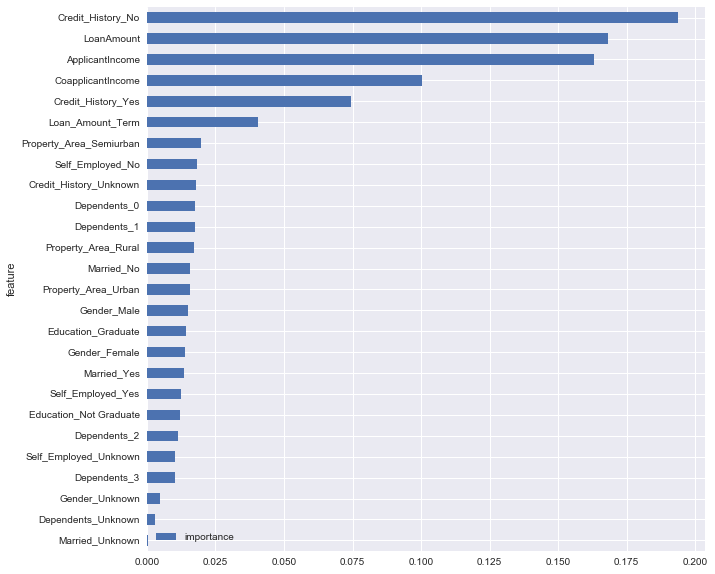

In [811]:
# Importance of each features

features = pd.DataFrame(dtype='object')
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 10))

Now we will best fit teh tarining and testing set by selectfrommodel feature of sklearn

In [812]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(614L, 6L)

In [813]:
test_reduced = model.transform(test)
test_reduced.shape

(367L, 6L)

In [814]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [815]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_Target, train_size=0.8)

In [816]:
param_grid = {'learning_rate': [0.03, 0.035],
                      'max_depth': [3, 4, 5],
                      'min_samples_leaf': [17, 18],
                      'max_features': [1.0, 0.95, 0.9],
                      'n_estimators': [100, 300, 500]
                      }
estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=param_grid,
                                 n_jobs=-1)
estimator.fit(X_train, y_train)
best_params = estimator.best_params_
                                 
validation_accuracy = estimator.score(X_val, y_val)
print('Validation accuracy: ', validation_accuracy)
best_params

('Validation accuracy: ', 0.84552845528455289)


{'learning_rate': 0.03,
 'max_depth': 3,
 'max_features': 1.0,
 'min_samples_leaf': 17,
 'n_estimators': 100}

In [817]:
#params that appeared most often after running the model ten times.
    
params = {'min_samples_leaf': 18, 'max_features': 0.9, 'max_depth': 3,
          'learning_rate': 0.03, 'n_estimators': 100}

In [818]:

#Fit model using our data and the best parameters found by GridSearchCV.

model = GradientBoostingClassifier(**params)
model.fit(train, Y_Target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=18,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [819]:
#Make predictions on the test set.

preds = model.predict(test)

In [820]:
preds = pd.Series(preds)
result = pd.concat([result, preds], names=['Loan_ID', 'Loan_Status'], axis=1)
result.columns = ['Loan_ID', 'Loan_Status']

result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [821]:
#Create CSV file for submission.

result.to_csv('loan_predict_result.csv', index=False)